# Baseline
> Conv model

In [3]:
from fastai.vision.all import *
from action_recognition.core import *
from action_recognition.models import *

In [4]:
set_seed(2021)

In [5]:
torch.cuda.set_device(0)
torch.cuda.get_device_name()

RuntimeError: The NVIDIA driver on your system is too old (found version 11020). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver.

In [6]:
data_path = Path.home()/'.fastai/data/UCF101-frames'

In [7]:
instances = get_instances(data_path)

## Params

In [8]:
seq_len = 20
step=5
image_size = 128
bs = 16
val_idxs = None

you could put this split on a text file:

In [9]:
dls = get_action_dataloaders(instances, bs=bs, image_size=image_size, seq_len=seq_len, step=step, val_idxs=val_idxs)

/home/pmishra/.local/lib/python3.8/site-packages/torch/cuda/__init__.py:138: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 11020). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:108.)
  return torch._C._cuda_getDeviceCount() > 0
/home/pmishra/.local/lib/python3.8/site-packages/fastai/torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


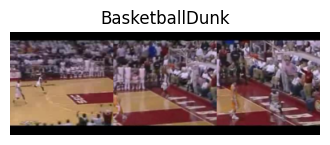

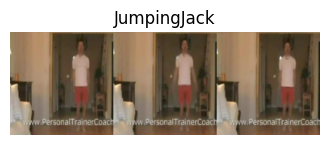

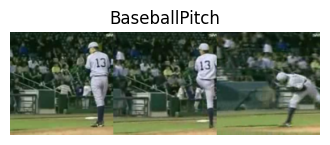

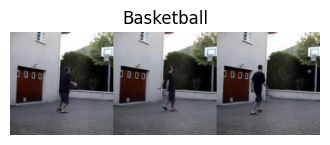

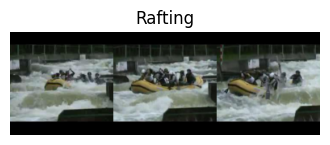

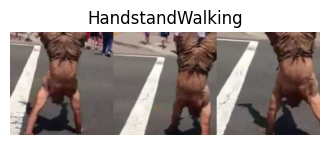

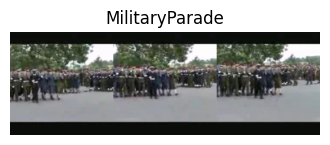

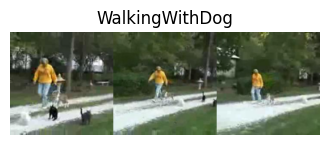

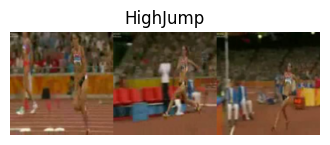

In [10]:
dls.show_batch()

## Train

In [11]:
model = SimpleModel(num_classes=dls.c, seq_len=seq_len)

/home/pmishra/.local/lib/python3.8/site-packages/fastai/vision/learner.py:295: UserWarning: `create_cnn_model` has been renamed to `create_vision_model` -- please update your code
  warn("`create_cnn_model` has been renamed to `create_vision_model` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /home/pmishra/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 113MB/s]


In [12]:
learn = Learner(dls, model, metrics=[accuracy, top_k_accuracy], wd=0.1, splitter=simple_splitter).to_fp16()
learn.freeze()

SuggestedLRs(valley=0.0006918309954926372)

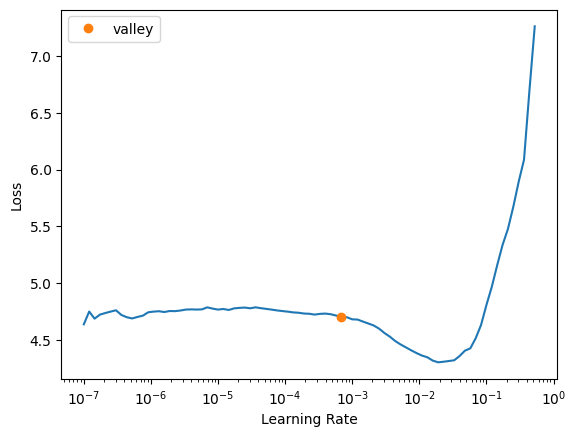

In [13]:
learn.lr_find()

In [14]:
learn.fit_one_cycle(10, 1e-3)

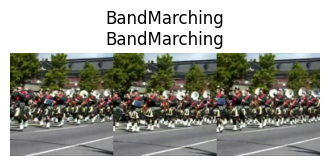

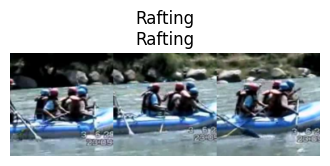

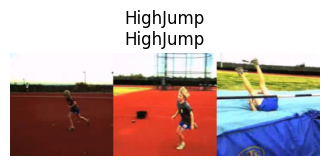

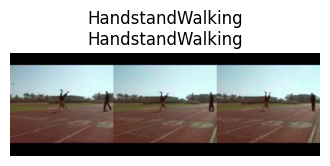

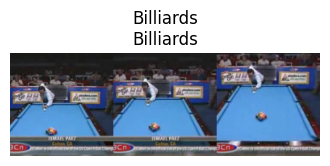

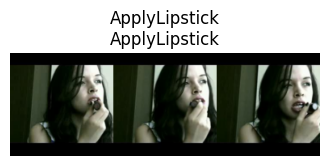

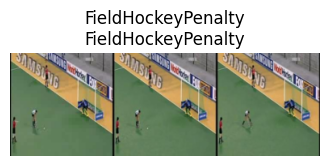

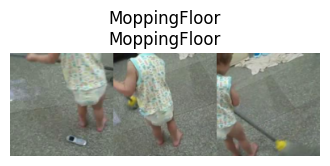

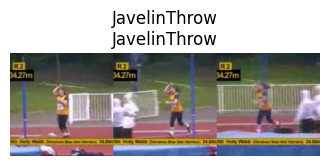

In [15]:
learn.show_results()

In [18]:
learn.validate()

(#3) [0.17985211312770844,0.9534534811973572,0.990240216255188]